### Tên dataset được sử dụng : Churn Modelling 
### Mô tả : Dataset chưa thông tin của khách hàng và biến mục tiêu là giá trị nhị phân thể hiện khách hàng có còn là khách hàng của ngân hàng nữa hay không 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename='Churn_Modelling.csv'
df = pd.read_csv(filename)
df.head(5)
print(df.shape)

(10000, 14)


In [5]:
# Loại bỏ cột "customerID" khỏi dữ liệu
df = df.drop("CustomerId", axis=1)
df = df.drop("RowNumber", axis=1)

In [6]:
name=list(df.columns)

In [7]:
types =df.dtypes
print(types)

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


<h2>BIỂU ĐỒ THỐNG KÊ<h2>

In [30]:
age = []
esti = []
for i in df[name[4]]:
    age.append(i)
for i in df[name[-2]]:
    esti.append(i)
# Sử dụng hàm zip() để kết hợp các phần tử từ hai mảng
zipped_data = zip(age, esti)
X = tuple(zipped_data)
sum_by_key = {}
for key, value in X:
    if key in sum_by_key:
        sum_by_key[key] += value
    else:
        sum_by_key[key] = value
# Sắp xếp tăng dần theo keys và tạo một danh sách các cặp key-value
sorted_items = sorted(sum_by_key.items())

# Tạo dictionary mới từ danh sách đã sắp xếp
sorted_dict = dict(sorted_items)

age_array = list(sorted_dict.keys())
esti_array = []
for i in sorted_dict.values():
    esti_array.append(round(i))

In [31]:
def count_occurrences(arr):
    # Sử dụng dictionary để lưu trữ số lần xuất hiện của mỗi phần tử
    occurrences = {}

    # Đếm số lần xuất hiện của từng phần tử trong mảng
    for num in arr:
        if num in occurrences:
            occurrences[num] += 1
        else:
            occurrences[num] = 1

    return occurrences
result = count_occurrences(age)

age_sort = sorted(result.items())
sorted_dict_age = dict(age_sort)
age_array = list(sorted_dict_age.keys())
sl_array = list(sorted_dict_age.values())

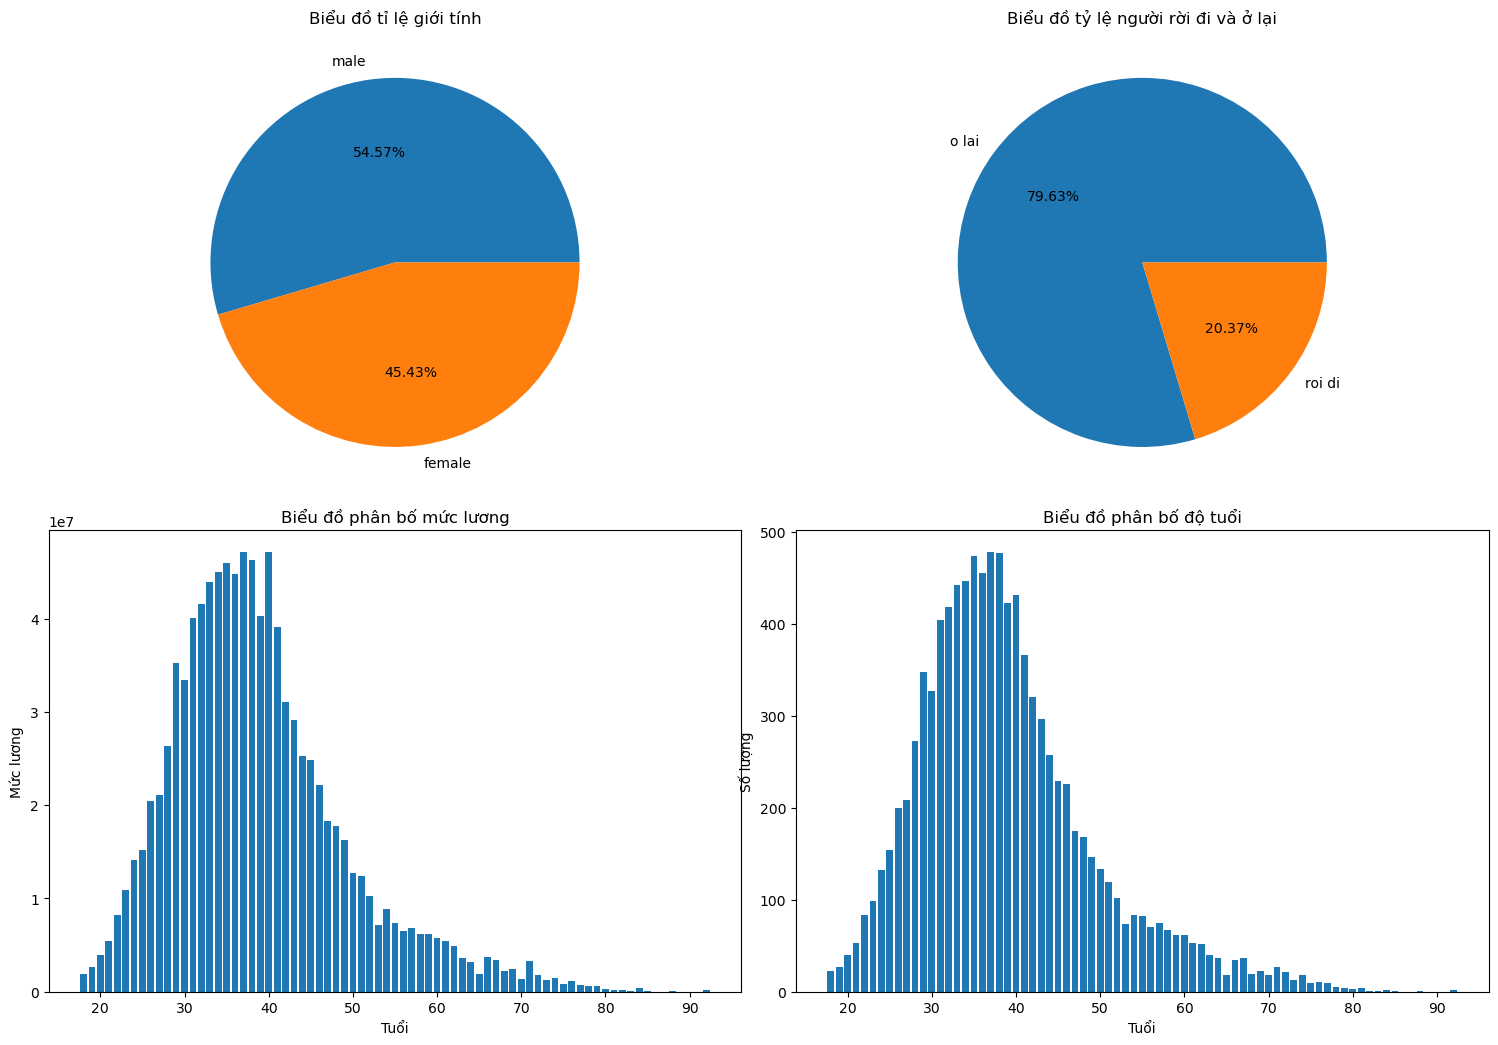

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))
fig.tight_layout()
#plt.subplot(2,2,1)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.8, top=0.9)
g = df[name[3]].value_counts()
gen = np.array([g[0], g[1]])
gioitinh = ['male', 'female']
ax[0,0].pie(gen, labels = gioitinh, autopct='%1.2f%%')
ax[0,0].set_title('Biểu đồ tỉ lệ giới tính')

#plt.subplot(2,2,2)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
j = df[name[-1]].value_counts()
ro = np.array([j[0],j[1]])
olai = ['o lai', 'roi di']
ax[0,1].pie(ro, labels = olai, autopct='%1.2f%%')
ax[0,1].set_title('Biểu đồ tỷ lệ người rời đi và ở lại')

#plt.subplot(2,2,3)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
ax[1,0].bar(age_array,esti_array)
ax[1,0].set_xlabel('Tuổi')
ax[1,0].set_ylabel('Mức lương')
ax[1,0].set_title('Biểu đồ phân bố mức lương')

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.9, top=0.9)
#bins = np.arange(17,93,5)
ax[1,1].bar(age_array, sl_array)
ax[1,1].set_xlabel('Tuổi')
ax[1,1].set_ylabel('Số lượng')
ax[1,1].set_title('Biểu đồ phân bố độ tuổi')
plt.show()

In [18]:
# Xử lý giá trị thiếu (nếu có)
df.dropna(inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,len(types)):
    if types[i]=='object':
            le.fit_transform(df[name[i]])
            df[name[i]]=le.transform(df[name[i]])

In [20]:
data= df.values
x= data[:,:-1]
y= data[:,-1]
print(x[0])
print(y[0])

[1.1150000e+03 6.1900000e+02 0.0000000e+00 0.0000000e+00 4.2000000e+01
 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0134888e+05]
1.0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(x)
X_scaler =scaler.transform(x)
print(X_scaler[0])

[0.38041624 0.538      0.         0.         0.32432432 0.2
 0.         0.         1.         1.         0.50673489]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(X_scaler,y,test_size=0.2,random_state=42)
print(y_train)

[0. 0. 1. ... 1. 1. 0.]


# Feature Selection 

In [23]:
print(df)

      Surname  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0        1115          619          0       0   42       2       0.00   
1        1177          608          2       0   41       1   83807.86   
2        2040          502          0       0   42       8  159660.80   
3         289          699          0       0   39       1       0.00   
4        1822          850          2       0   43       2  125510.82   
...       ...          ...        ...     ...  ...     ...        ...   
9995     1999          771          0       1   39       5       0.00   
9996     1336          516          0       1   35      10   57369.61   
9997     1570          709          0       0   36       7       0.00   
9998     2345          772          1       1   42       3   75075.31   
9999     2751          792          0       0   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1   

In [ ]:
/* Trước khi sử dụng các phương pháp để đánh giá các đặc trưng của bài toán thì chúng ta sẽ dùng kinh nghiệm và sự hiểu biết để 
tìm ra đâu là những đặc trưng quan trọng nhất.
Muốn biết khách hàng có tiếp tục sử dụng dịch vụ của ngân hàng hay không thì những đặc trưng quan trọng ảnh hưởng lớn đến giá 
trị nhị phân của biến mục tiêu sẽ là : 
    1/ Tenure : số năm khách hàng gắn bó với ngân hàng
    2/ Balance : Số dư trong tài khoản của khách hàng
    3/ NumOfProducts : Số lượng sản phẩm của ngân hàng mà khách hàng đang sử dụng
    4/ HasCrCard : là giá trị nhị phân thể hiện khách hàng có thẻ tín dụng của ngân hàng hay không 
    5/ IsActiveMember : là giá trị nhị phân thể hiệ khách hàng có phải là khách hàng tích cực đối với ngân hàng hay không
    6/ EstimatedSalary : Mức lương ước tính bằng đô la của khách hàng
*/

In [30]:
#1_Feature Important 
#Đánh giá feature dựa trên mô hình Hồi quy Logic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
importance = model.coef_

arr = importance.flatten()

#Độ quan trọng vủa feature thể hiện bằng độ lớn giá trị tuyệt đối
importance = np.abs(arr)

print("--------Độ quan trọng của từng feature--------")
i = 1
for v in enumerate(arr):
    print("Đặc trưng:",i,"Score:",arr[i-1])
    i = i + 1

print("\n--------Sắp xếp các feature theo thứ tự độ quan trọng tăng dần--------")
indices = np.argsort(importance)
idx = 0
for i, idx in enumerate(indices):
    print(f"Đặc trưng {idx+1}: {importance[idx]}")

--------Độ quan trọng của từng feature--------
Đặc trưng: 1 Score: -0.14180813214529703
Đặc trưng: 2 Score: -0.33534727261081426
Đặc trưng: 3 Score: 0.21252504695714652
Đặc trưng: 4 Score: -0.5383561261075653
Đặc trưng: 5 Score: 5.087431658227561
Đặc trưng: 6 Score: -0.140504147922081
Đặc trưng: 7 Score: 1.1909985563716983
Đặc trưng: 8 Score: -0.15236066296067025
Đặc trưng: 9 Score: -0.009611248642201786
Đặc trưng: 10 Score: -1.0503020594954455
Đặc trưng: 11 Score: 0.06789603625315101

--------Sắp xếp các feature theo thứ tự độ quan trọng tăng dần--------
Đặc trưng 9: 0.009611248642201786
Đặc trưng 11: 0.06789603625315101
Đặc trưng 6: 0.140504147922081
Đặc trưng 1: 0.14180813214529703
Đặc trưng 8: 0.15236066296067025
Đặc trưng 3: 0.21252504695714652
Đặc trưng 2: 0.33534727261081426
Đặc trưng 4: 0.5383561261075653
Đặc trưng 10: 1.0503020594954455
Đặc trưng 7: 1.1909985563716983
Đặc trưng 5: 5.087431658227561


In [ ]:
/*
Khi dùng hàm coef_ (coefficients) thì chỉ đánh giá độ ảnh hưởng của một đặc trưng độc lập lên biến mục tiêu khi giữ các đặc 
trưng khác không đổi. Nếu có sự tương quan mạnh giữa các đặc trưng, hệ số có thể không phản ánh đúng độ quan trọng của từng đặc 
trưng một cách riêng biệt.
Như trong kết quá ta thấy đặc trưng 9 ảnh hưởng đến kết quả của biến mục tiêu thấp nhất là hoàn toàn sai
Cũng như đặc trưng 1 là tên của Khách hàng rõ ràng không hề ảnh hưởng gì đến việc khách hàng có tiếp tục sử dụng dịch vụ của
ngân hàng hay không nhưng lại xếp thứ 3.
*/

In [37]:
#2_Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Khởi tạo đối tượng SelectKBest với phương pháp kiểm định chi-square
kbest = SelectKBest(score_func=chi2, k=4)

# Áp dụng SelectKBest lên dữ liệu
X_new = kbest.fit_transform(x, y)

# Lấy chỉ số của các feature được chọn
selected_features = kbest.get_support(indices=True)

# In ra các feature được chọn
for feature_idx in selected_features:
    print(f"Selected Feature: {feature_idx+1}")

Selected Feature: 1
Selected Feature: 5
Selected Feature: 7
Selected Feature: 11


In [ ]:
/*
Univariate Selection tính toán độ quan trọng của từng đặc trưng sau đó dựa vào hệ số k để in ra k đặc trưng có độ quan trọng 
cao nhất
*/

In [38]:
#3_L1 Regularization
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Đào tạo mô hình trên dữ liệu
lasso.fit(x, y)
# Lấy hệ số của các feature
feature_coef = lasso.coef_

# Lấy chỉ số của các feature có hệ số khác 0
selected_features = np.where(feature_coef != 0)[0]

# In ra các feature được chọn
for feature_idx in selected_features:
    print(f"Selected Feature: {feature_idx+1}")

Selected Feature: 1
Selected Feature: 2
Selected Feature: 5
Selected Feature: 7
Selected Feature: 11


In [ ]:
/*
Ở phương pháp L1 Regularization này, sau khi huấn luyện mô hình Lasso Regression, những đặc trưng ít ảnh hưởng đến mô hình sẽ 
được đẩy giá trị của hệ số gần về 0 và các đặc trưng quan trọng thì ngược lại. Sau đó lấy giá trị tuyệt đối, hệ số của đặc trưng
nào khác 0 thì đó là đặc trưng quan trọng được chọn
*/

In [41]:
#4_Principal Component Analysis ( PCA ) 
from sklearn.decomposition import PCA
import numpy as np

# Khởi tạo đối tượng PCA với số đặc trưng được chọn là 2
pca = PCA(n_components=2)

# Áp dụng PCA lên dữ liệu
X_new = pca.fit_transform(x)

# Trích xuất độ quan trọng của các đặc trưng
feature_importance = pca.explained_variance_ratio_

# Trích xuất các thành phần chính
components = pca.components_

# Hiển thị đặc trưng và độ quan trọng tương ứng
sorted_indices = np.argsort(feature_importance)[::-1]
for i, idx in enumerate(sorted_indices):
    importance = feature_importance[idx]
    feature = components[idx]
    feature_index = np.argsort(feature)[::-1]
    print(f"Đặc trưng {feature_index+1}: {importance:.4f}")

Đặc trưng [ 7 11  1  2  5  3  4 10  9  6  8]: 0.5411
Đặc trưng [ 7  2  5  3 10  4  9  8  6  1 11]: 0.4588


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


In [14]:
# Initialize the models
Logistic_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) as needed
tree=DecisionTreeClassifier()
gaussian_nb = GaussianNB()

# Train the models
Logistic_reg.fit(x_train, y_train)
knn.fit(x_train, y_train)
tree.fit(x_train, y_train)
gaussian_nb.fit(x_train, y_train)
# Make predictions
y_pred_log = Logistic_reg.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree= tree.predict(x_test)
y_pred_gaussian = gaussian_nb.predict(x_test)
print(y_pred_log)
print(y_pred_knn)
print(y_pred_tree)
print(y_pred_gaussian)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 0. 0.]
[0. 0. 0. ... 1. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def Evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
print("LogisticRegression:")
Evaluate(y_test, y_pred_log)
  
# Evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
Evaluate(y_test, y_pred_knn)

# Evaluate DecisionTree
print("\nDecisionTree")
Evaluate(y_test, y_pred_tree)

# Evaluate Gaussian
print("\nGaussian:")
Evaluate(y_test, y_pred_gaussian)


LogisticRegression:
Accuracy: 0.8145
Precision: 0.5982142857142857
Recall: 0.17048346055979643
F1-score: 0.2653465346534653

K-Nearest Neighbors:
Accuracy: 0.7995
Precision: 0.4844961240310077
Recall: 0.31806615776081426
F1-score: 0.38402457757296465

DecisionTree
Accuracy: 0.781
Precision: 0.4492099322799097
Recall: 0.5063613231552163
F1-score: 0.47607655502392343

Gaussian:
Accuracy: 0.8295
Precision: 0.6884057971014492
Recall: 0.24173027989821882
F1-score: 0.3578154425612053


# Ensemble Learing 

### GradientBoostingClassifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
y_pred= clf_1.predict(x_test)
print("GradientBoostingClassifier:")
Evaluate(y_test, y_pred)

GradientBoostingClassifier:
Accuracy: 0.856
Precision: 0.6895306859205776
Recall: 0.4860050890585242
F1-score: 0.5701492537313433


### RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf_2.predict(x_test)
print("RandomForestClassifier:")
Evaluate(y_test, y_pred)

RandomForestClassifier:
Accuracy: 0.8555
Precision: 0.7363636363636363
Recall: 0.4122137404580153
F1-score: 0.5285481239804242


### ExtraTreesClassifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
clf_3 = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0).fit(x_train, y_train)
y_pred= clf_3.predict(x_test)
print("ExtraTreesClassifier:")
Evaluate(y_test, y_pred)

ExtraTreesClassifier:
Accuracy: 0.851
Precision: 0.7251184834123223
Recall: 0.3893129770992366
F1-score: 0.5066225165562914
